In [2]:
import numpy as np
import pandas as pd
import pylab as plt

import time

*Teste linear fitting usando numpy*

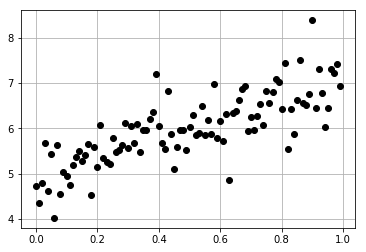

In [3]:
t = np.arange(0,1,0.01);
f = t*2 +5 + np.random.normal(loc=0,scale=.5,size=len(t))

plt.plot(t,f, 'ok'); plt.grid()


In [4]:
m,b = np.polyfit(t,f, 1)

In [5]:
ffit = lambda x: x*m + b

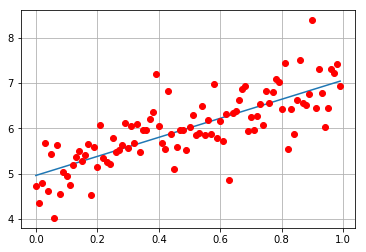

In [6]:
plt.plot(t,ffit(t), t, f,'or'); plt.grid()

In [7]:
from scipy import stats

usando o scipy:

In [8]:
stats.linregress(t,f)

LinregressResult(slope=2.105151563900797, intercept=4.959829267004642, rvalue=0.7815209978555439, pvalue=8.499326507819312e-22, stderr=0.16975790411541922)

usando o _skyplearn_

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
adv = pd.read_csv('C:\Users\Felipe\Documents\Python Scripts\Advertising.csv')
por = pd.read_csv('C:\Users\Felipe\Documents\Python Scripts\Portland_housePrices.csv')


print u"Advertising\r\n"

/display adv.head() 

print u"\r\nPortland_housePrices\r\n"

/display  por.head() 

Advertising



,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9



Portland_housePrices



,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [11]:
def serieToSingleDataFrame(data,colStr): 
    try:
        return data.loc[:,[colStr]]
    except:
        print "formato invalido"

In [12]:
X = por.loc[:,['quartos']]
Y = por.loc[:,['preco']]

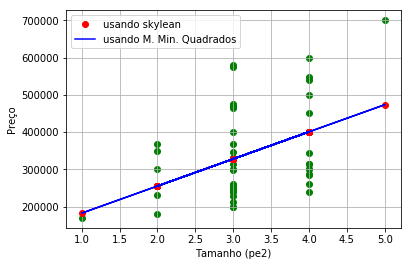

In [13]:
fitModel = LinearRegression().fit(X,Y)

a,b = np.polyfit(X.quartos.values, Y.preco.values,1)

ffit = lambda x: x*a + b

plt.scatter(X, Y,color='g')
plt.plot(X, fitModel.predict(X),'or', label="usando skylean")

plt.plot(X.quartos.values, ffit(X.quartos.values),color='b', label="usando M. Min. Quadrados")
plt.xlabel(u'Tamanho (pe2)')
plt.ylabel(u'Preço'); plt.grid()

plt.legend();

In [14]:
from sklearn.metrics import r2_score
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2.0).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [15]:
print calc_rss(Y,fitModel.predict(X))
print calc_r2(Y,fitModel.predict(X))

5.78535325113e+11
-3.112607855431998


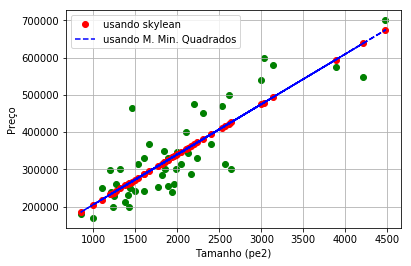

In [16]:

X = por.loc[:,['tamanho']]
Y = por.loc[:,['preco']]

fitModel = LinearRegression().fit(X,Y)

a,b = np.polyfit(X.tamanho.values, Y.preco.values,1)

ffit = lambda x: x*a + b

plt.scatter(X, Y,color='g')
plt.plot(X, fitModel.predict(X),'or', label="usando skylean")

plt.plot(X.tamanho.values, ffit(X.tamanho.values),'--b', label="usando M. Min. Quadrados")
plt.xlabel(u'Tamanho (pe2)')
plt.ylabel(u'Preço'); plt.grid()

plt.legend();

In [17]:
print calc_rss(Y,fitModel.predict(X))
print calc_r2(Y,fitModel.predict(X))

1.93464477601e+11
0.6320180251851149


In [18]:
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


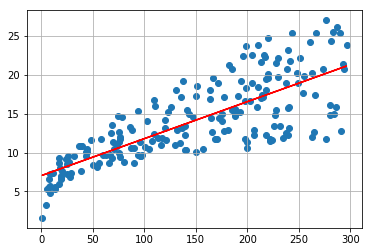

In [19]:
aafit = np.polyfit(adv.TV.values, adv.sales.values,1)
aafitfuncao = np.poly1d(aafit)
plt.scatter(adv.TV.values, adv.sales.values)
plt.plot(adv.TV.values, aafitfuncao(adv.TV.values), 'r' ); plt.grid()


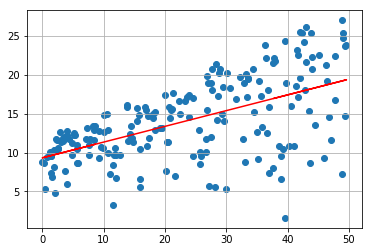

In [20]:
aafit = np.polyfit(adv.radio.values, adv.sales.values,1)
aafitfuncao = np.poly1d(aafit)
plt.scatter(adv.radio.values, adv.sales.values)
plt.plot(adv.radio.values, aafitfuncao(adv.radio.values), 'r' ); plt.grid()


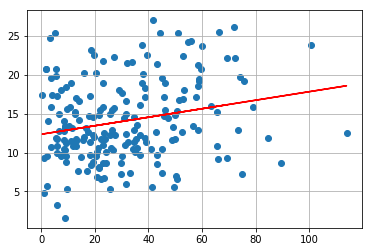

In [352]:
aafit = np.polyfit(adv.newspaper.values, adv.sales.values,1)
aafitfuncao = np.poly1d(aafit)
plt.scatter(adv.newspaper.values, adv.sales.values)
plt.plot(adv.newspaper.values, aafitfuncao(adv.newspaper.values), 'r' ); plt.grid()



In [357]:
def mprint(valor, des=""): print "{0}: {1:.3f}".format(des,valor)

In [22]:
print stats.linregress(adv.newspaper.values, adv.sales.values)[2]
print stats.linregress(adv.radio.values, adv.sales.values)[2]
print (stats.linregress(adv.TV.values, adv.sales.values)[2])

0.22829902637616528
0.576222574571055
0.7822244248616063


In [363]:
mprint( calc_rss(norm(aafitfuncao(adv.TV.values)),norm(adv.TV.values)), 'TV\t - rss' )
mprint( calc_rss(norm(aafitfuncao(adv.radio.values)),norm(adv.radio.values)), 'Radio\t - rss' )
mprint( calc_rss(norm(aafitfuncao(adv.newspaper.values)),norm(adv.newspaper.values)), 'Jornal\t - rss' )

TV	 - rss: 12.619
Radio	 - rss: 49.893
Jornal	 - rss: 50.530


In [23]:
from sklearn.linear_model import SGDRegressor

C:\Users\Felipe\Miniconda2\envs\spyder\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\Felipe\Miniconda2\envs\spyder\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


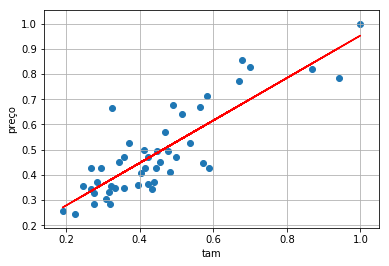

In [24]:
sgdfitModel = SGDRegressor(max_iter=5000,alpha=0)

X = por.loc[:,['tamanho']]
Y = por.loc[:,['preco']]

xnorm = X/X.tamanho.max()
ynorm = Y/Y.preco.max()

sgdfitModel.fit(xnorm,ynorm);

#sgdfitModel.predict(xnorm)

plt.scatter(xnorm, ynorm)
plt.plot(xnorm, sgdfitModel.predict(xnorm), 'r' ); plt.grid()
plt.xlabel('tam'); plt.ylabel(u'preço');



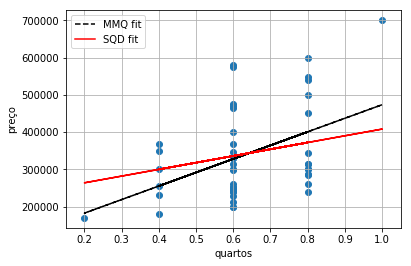

In [25]:
sgdfitModel = SGDRegressor(max_iter=100, alpha=0)

sgdfitModel.coef_ = 1;
X = por.loc[:,['quartos']]
Y = por.loc[:,['preco']]

xnorm = X/X.quartos.max()
ynorm = Y #ñ precisa norm. o Y

#for _ in range(1000): sgdfitModel.fit(xnorm,ynorm)


aafitQ = np.polyfit(xnorm.quartos.values, ynorm.preco.values,1)

aafitfuncaoQ = np.poly1d(aafitQ)

sgdfitModel.fit(xnorm,ynorm)

plt.scatter(xnorm, ynorm)
plt.plot(xnorm, aafitfuncaoQ(xnorm), '--k', label="MMQ fit" );
plt.plot(xnorm, sgdfitModel.predict(xnorm), 'r' , label="SQD fit"); plt.grid()
plt.xlabel(u'quartos'); plt.ylabel(u'preço');
plt.legend();


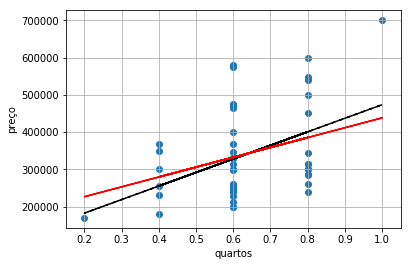

In [26]:
for _ in range(1000): sgdfitModel.partial_fit(xnorm,ynorm)

plt.scatter(xnorm, ynorm)
plt.plot(xnorm, aafitfuncaoQ(xnorm), '--k', label="MMQ fit" );
plt.plot(xnorm, sgdfitModel.predict(xnorm), 'r', label="SQD fit steped" ); plt.grid()
plt.xlabel(u'quartos'); plt.ylabel(u'preço');

*Exercício 3*
Para cada um dos conjuntos de treinamento, utilize a função fit múltiplas vezes considerando apenas um atributo preditor.

1. O modelo aprendido muda a cada vez que a função fit é utilizada?

`sim, o existe o método partial_fit() que realiza separadamente cada iteração (toda vez que é chamado)`

2. Os modelos finais aprendidos são os mesmos da outra implementação de regressão linear?

`não, este não usa o método dos mínimos quadrados, o esquema de iterações é diferente, ele não passa por todos os pontos (x,y) da lista, e sim segue um critério de parada`

In [27]:
por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [28]:
porTamanhoQuarto = por.drop(columns=['preco'])
porPreco = serieToSingleDataFrame(por,'preco')

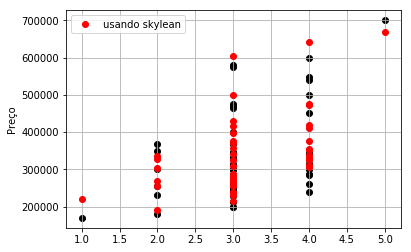

In [29]:
fitModel = LinearRegression();

tick = time.time()
fitModel.fit(porTamanhoQuarto,porPreco)
fitModel.predict(porTamanhoQuarto)
tack = time.time()

plt.scatter(X, Y,color='k')
#plt.plot(X, fitModel.predkct(porTamanhoQuarto),'or', label="usando skylean")

plt.plot(por.quartos.values, fitModel.predict(porTamanhoQuarto),'or', label="usando skylean")

plt.ylabel(u'Preço'); plt.grid()

plt.legend();

In [30]:
print "tempo (s) = {0:.4f}".format(tack-tick)

tempo (s) = 0.0030


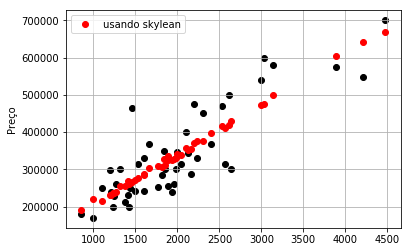

In [31]:
plt.scatter(por.tamanho, Y,color='k')
#plt.plot(X, fitModel.predkct(porTamanhoQuarto),'or', label="usando skylean")

plt.plot(por.tamanho.values, fitModel.predict(porTamanhoQuarto),'or', label="usando skylean")

plt.ylabel(u'Preço'); plt.grid()

plt.legend();

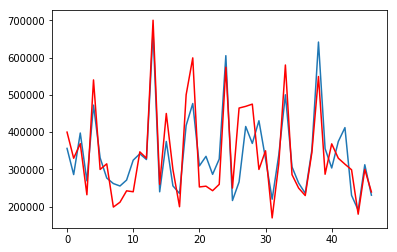

In [32]:
t=range(len(por.preco.values))

plt.plot(t,fitModel.predict(porTamanhoQuarto).transpose()[0], t, por.preco.values, 'r');

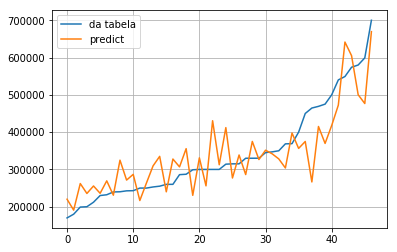

In [33]:
lls = np.array([fitModel.predict(porTamanhoQuarto).transpose()[0], por.preco.values]).transpose()

llsS = lls.tolist()

llsS.sort(key=lambda x: x[1])

t=range(len(por.preco.values))

plt.plot(np.array(llsS)[:,1], label=u"da tabela")
plt.plot(np.array(llsS)[:,0], label=u"predict"); plt.grid(); plt.legend();


In [34]:
previsaoQuartoeTamanho = fitModel.predict(porTamanhoQuarto).transpose()[0]

In [35]:
def norm(vet): return vet/vet.max()

In [36]:
print u"r²={0:.3f}".format(calc_r2(predicted=previsaoQuartoeTamanho, y= porPreco.values.flatten()))

r²=0.636


In [37]:
calc_rss(predicted=norm(previsaoQuartoeTamanho), y= norm(porPreco.values.flatten()))

12.335175365809251

In [38]:
porTamanhoQuarto.tamanho = norm(porTamanhoQuarto.tamanho)
porTamanhoQuarto.quartos = norm(porTamanhoQuarto.quartos)

porTamanhoQuarto.head(10)

,tamanho,quartos
0,0.469853,0.6
1,0.357302,0.6
2,0.535954,0.6
3,0.316213,0.4
4,0.669942,0.8
5,0.443278,0.8
6,0.342564,0.6
7,0.318669,0.6
8,0.308173,0.6
9,0.333631,0.6


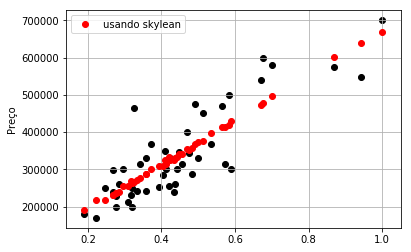

In [39]:
sgdfitModel = SGDRegressor(max_iter=15000, alpha=0)

sgdfitModel.coef_ = 1;
xnorm = porTamanhoQuarto
ynorm = porPreco

tick = time.time()
sgdfitModel.fit(xnorm,ynorm)
predicao = sgdfitModel.predict(xnorm)
tack = time.time()

plt.scatter(xnorm.tamanho.values, ynorm.preco.values,color='k')
#plt.plot(X, fitModel.predkct(porTamanhoQuarto),'or', label="usando skylean")

plt.plot(xnorm.tamanho.values, predicao,'or', label="usando skylean")

plt.ylabel(u'Preço'); plt.grid()

plt.legend();


In [40]:
print "tempo (s) = {0:.4f}".format(tack-tick)

tempo (s) = 0.0580


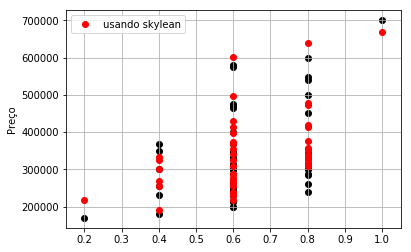

In [41]:
plt.scatter(xnorm.quartos.values, ynorm.preco.values,color='k')
#plt.plot(X, fitModel.predkct(porTamanhoQuarto),'or', label="usando skylean")

plt.plot(xnorm.quartos, predicao,'or', label="usando skylean")

plt.ylabel(u'Preço'); plt.grid()

plt.legend();

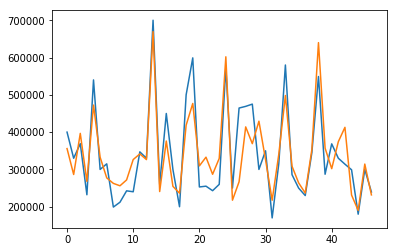

In [42]:
t=range(len(por.preco.values))

plt.plot(ynorm.preco.values)
plt.plot(predicao);

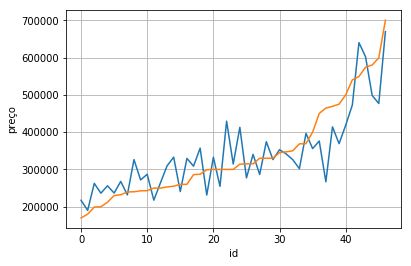

In [43]:
algo = zip(predicao,ynorm.preco.values)
algo.sort(key=lambda x: x[1])

plt.plot(algo); plt.grid(); plt.ylabel(u"preço"); plt.xlabel("id");

In [44]:
print u"r²={0:.3f}".format(calc_r2(predicted=predicao, y= porPreco.values.flatten()))

r²=0.633


In [45]:
print u"RSS={0:.3f}".format(calc_rss(predicted=norm(predicao), y= norm(porPreco.values.flatten())))

RSS=12.325


## Exercício 4

Aprenda modelos utilizando todos os atributos de entrada.

1. Baseado no RSS e no R^2, é possível obter um modelo melhor utilizando todos os dados?

`sim, mas penas quando os dados de cada coluna estao estatisticamente dependentes, caso contrario, uma das colunas só prejudica a predição`

2. Existem atributos que poderiam ser desconsiderados sem que fosse afetada a precisão?

`sim, não há uma correlação nítida (r² ~ 1.0 ) para afirmar que o número de quartos é bem proporcional ao preço, e sim o tamannho total do imóvel, o r² deste 2D e do tamanho são muito próximos`

3) Qual implementação treina mais rápido? A com método dos mínimos quadrados ou a com descida de gradiente?

`MMQ é mais rápido, 3 ticks, enquanto que o outro método 57 ticks)`

tv, radio, jornal

In [46]:
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


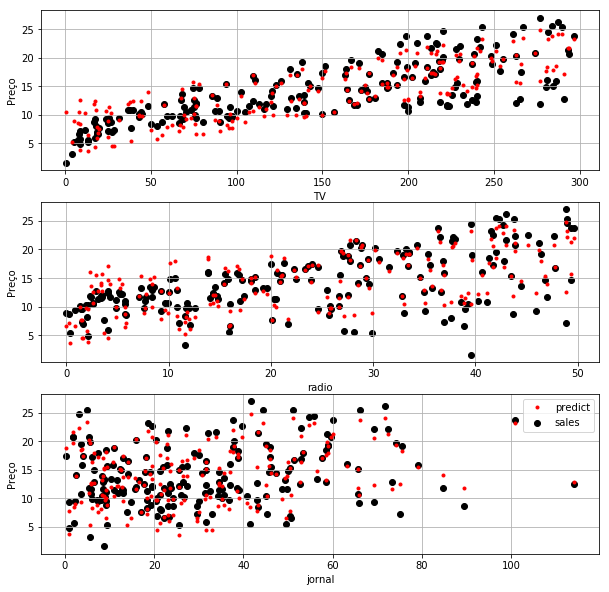

In [47]:
fitModel = LinearRegression();

advT = adv.drop(columns=['sales'])

adv_sales = serieToSingleDataFrame(adv, 'sales')

tick = time.time()
fitModel.fit(advT,adv_sales)
adv_sales_predict = fitModel.predict(advT)
tack = time.time()

#plt.plot(X, fitModel.predkct(porTamanhoQuarto),'or', label="usando skylean")

plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
plt.scatter(adv.TV.values, adv.sales,color='k')
plt.plot(adv.TV.values, adv_sales_predict,'.r', label="usando skylean")
plt.ylabel(u'Preço'); plt.xlabel(u'TV'); plt.grid()

plt.subplot(3,1,2)
plt.scatter(adv.radio, adv.sales,color='k')
plt.plot(adv.radio.values, adv_sales_predict,'.r', label="usando skylean")
plt.ylabel(u'Preço'); plt.xlabel(u'radio'); plt.grid()

plt.subplot(3,1,3)
plt.scatter(adv.newspaper, adv.sales,color='k')
plt.plot(adv.newspaper.values, adv_sales_predict,'.r', label="predict")
plt.ylabel(u'Preço'); plt.xlabel(u'jornal'); plt.grid()

plt.legend();

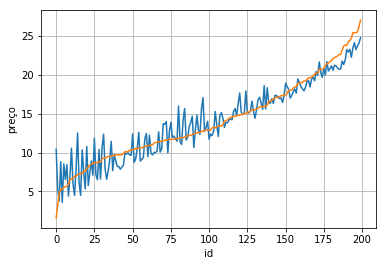

In [48]:
algo = zip(adv_sales_predict.flatten(),adv_sales.values)
algo.sort(key=lambda x: x[1])

plt.plot(algo); plt.grid(); plt.ylabel(u"preço"); plt.xlabel("id");

In [49]:
calc_r2(predicted=adv_sales_predict.flatten(), y=adv_sales.values.flatten())

0.8854844612977885

In [50]:
calc_rss(predicted=norm(adv_sales_predict.flatten()), y=norm(adv_sales.values.flatten()))

1.2700681916008194

In [51]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

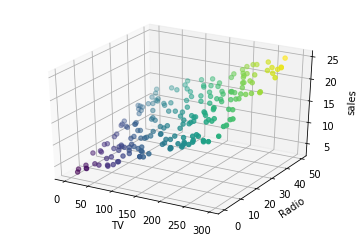

In [52]:
#%matplotlib qt # para plotar com interação # %matplotlib inline para ver no notebook

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(adv.TV.values, adv.radio.values, adv_sales_predict.flatten(),c=adv_sales_predict.flatten(),depthshade=True,);
ax.set_xlabel('TV'); ax.set_ylabel('Radio'); ax.set_zlabel('sales');

## Experimentos

### Detector de máximo e mínimos por agrupamentos regulares:

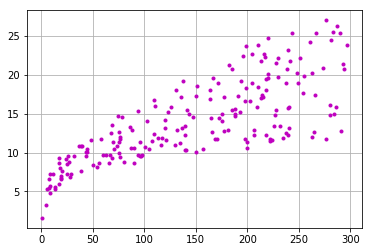

In [150]:
plt.plot(adv.TV, adv.sales, '.m'); plt.grid()

In [192]:
#esquema para separa máximos e mínimos

ndicesAux = zip((adv.sales.max()/10)*np.arange(10),(adv.sales.max()/10)*np.arange(1,10+1))

loreA = map(lambda xx: [adv[ (adv.TV>xx[0]) & (adv.TV <xx[1])].TV.max(), adv[ (adv.TV>xx[0]) & (adv.TV <xx[1])].TV.min()], ndicesAux )


In [193]:
loreA

[[0.7, 0.7],
 [4.1, 4.1],
 [7.8, 7.3],
 [8.7, 8.4],
 [13.2, 11.7],
 [nan, nan],
 [18.8, 16.9],
 [19.6, 19.4],
 [23.8, 23.8],
 [26.8, 25.0]]

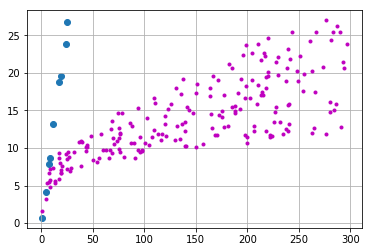

In [195]:
plt.scatter(np.array(loreA)[:,1],np.array(loreA)[:,0])
plt.plot(adv.TV, adv.sales, '.m'); plt.grid()

### Detector de envoltória e spline

Bom para verificar os _bounds_ superior e inferior para scatters com tendência a formatos geométricos

In [300]:
adv.sort_values(['sales']).TV.values;

In [202]:
from numpy import array, sign, zeros
from scipy.interpolate import interp1d

s = adv.sort_values(['sales']).TV.values

q_u = zeros(s.shape)
q_l = zeros(s.shape)

#Prepend the first value of (s) to the interpolating values. This forces the model to use the same starting point for both the upper and lower envelope models.

u_x = [0,]
u_y = [s[0],]

l_x = [0,]
l_y = [s[0],]

#Detect peaks and troughs and mark their location in u_x,u_y,l_x,l_y respectively.

for k in xrange(1,len(s)-1):
    if (sign(s[k]-s[k-1])==1) and (sign(s[k]-s[k+1])==1):
        u_x.append(k)
        u_y.append(s[k])

    if (sign(s[k]-s[k-1])==-1) and ((sign(s[k]-s[k+1]))==-1):
        l_x.append(k)
        l_y.append(s[k])

#Append the last value of (s) to the interpolating values. This forces the model to use the same ending point for both the upper and lower envelope models.

u_x.append(len(s)-1)
u_y.append(s[-1])

l_x.append(len(s)-1)
l_y.append(s[-1])

#Fit suitable models to the data. Here I am using cubic splines, similarly to the MATLAB example given in the question.

u_p = interp1d(u_x,u_y, kind = 'cubic',bounds_error = False, fill_value=0.0)
l_p = interp1d(l_x,l_y,kind = 'cubic',bounds_error = False, fill_value=0.0)

#Evaluate each model over the domain of (s)
for k in xrange(0,len(s)):
    q_u[k] = u_p(k)
    q_l[k] = l_p(k)

#Plot everything
#plot(s);hold(True);plot(q_u,'r');plot(q_l,'g');grid(True);show()

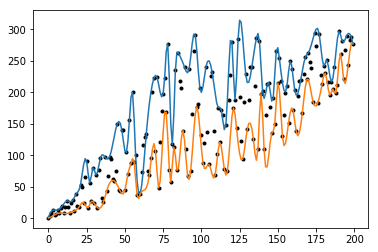

In [213]:
plt.plot(s, ".k");plt.plot(q_u); plt.plot(q_l)

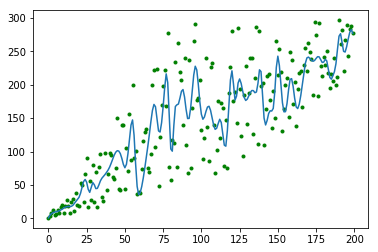

In [217]:
plt.plot(s, ".g");plt.plot(( q_u+q_l)/2);

### "Regressão" com filtros de resposta finita (FIR)

In [223]:
coi = norm(adv.sort_values(['sales']).TV.values)

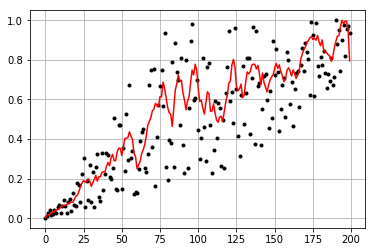

In [261]:
plt.plot(norm(adv.sort_values(['sales']).TV.values),'.k')

filtroFIR = norm(np.convolve([0,0,1,2,2,2,2,2,2],coi,mode='same') )

plt.plot(filtroFIR ,'r'); plt.grid()

In [278]:
ben = np.array([np.arange(len(filtroFIR)),filtroFIR]).transpose()

ben[:,0] = ben[:,0]*(300/float(len(ben[:,0]))) #arruma os pontos (super amostragem)

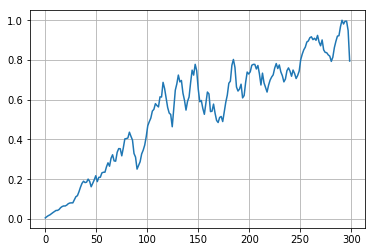

In [283]:
plt.plot(ben[:,0],ben[:,1]); plt.grid()

In [297]:
QUERO = adv.sort_values(['sales']).TV.values

In [299]:
calc_rss(norm(QUERO), norm(filtroFIR))

4.950682938764222

### Filtro Média movel

In [321]:

N=5

filtroPassaBaixa = np.convolve(filtroFIR, np.ones((N,))/N, mode='valid')

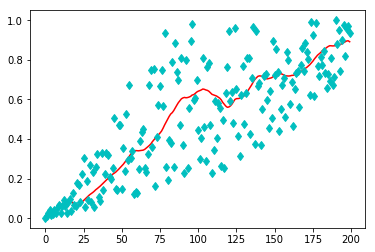

In [350]:

fpb_cor = np.concatenate([filtroFIR[0:N-1],filtroPassaBaixa ])

plt.plot(fff, 'r')
plt.plot(norm(QUERO), 'dc');

In [323]:
calc_rss(norm(QUERO), norm(fpb_cor))

5.822012202711919

In [347]:
N=10

filtroPassaBaixaOri = np.convolve(QUERO, np.ones((N,))/N, mode='valid')

filtroPassaBaixaOri_cor = np.concatenate([filtroFIR[0:N-1],filtroPassaBaixaOri ])

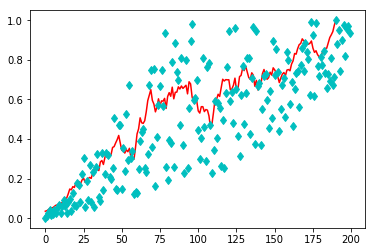

In [351]:
plt.plot(norm(filtroPassaBaixaOri), 'r')
plt.plot(norm(QUERO), 'dc');

In [349]:
calc_rss(norm(QUERO), norm(filtroPassaBaixaOri_cor))

4.997348002231086

**não pode ter buracos nas amostras do X**